<a href="https://colab.research.google.com/github/thirudongr/TASK2-Stock-price-Prediction/blob/main/Stock_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing the Libraries

In [1]:
import math
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


2. Loading Dataset

In [2]:
stock_data = pd.read_csv("/content/archive.zip")
stock_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


Plotting close price

In [3]:
stock_data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

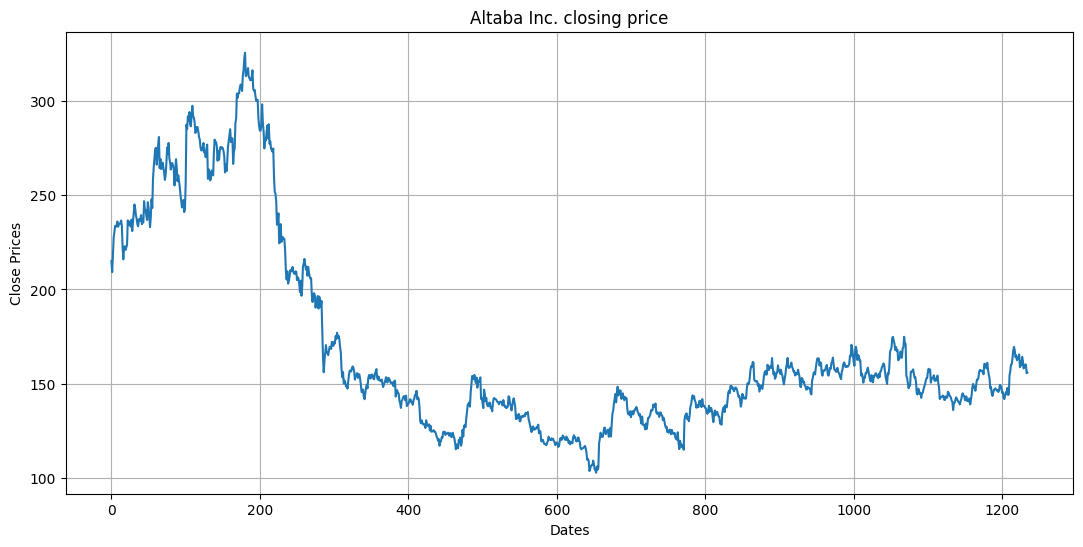

In [4]:
plt.figure(figsize=(13,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(stock_data['Close'])
plt.title('Altaba Inc. closing price')
plt.show()



In [13]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


3. Feature Scaling


In [6]:
train_set = stock_data.iloc[:500, 1:2].values
test_set = stock_data.iloc[500:, 1:2].values


In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
train_set = sc.fit_transform(train_set)

4. Creating Data with Timesteps

In [8]:
X_train = []
y_train = []
for i in range(60, 500):
    X_train.append(train_set[i-60:i, 0])
    y_train.append(train_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

5. Building the LSTM

In [9]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 50))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
14/14 [==============================] - 11s 116ms/step - loss: 0.1896
Epoch 2/100
14/14 [==============================] - 2s 117ms/step - loss: 0.0676
Epoch 3/100
14/14 [==============================] - 2s 117ms/step - loss: 0.0321
Epoch 4/100
14/14 [==============================] - 2s 118ms/step - loss: 0.0230
Epoch 5/100
14/14 [==============================] - 2s 117ms/step - loss: 0.0210
Epoch 6/100
14/14 [==============================] - 2s 150ms/step - loss: 0.0183
Epoch 7/100
14/14 [==============================] - 2s 167ms/step - loss: 0.0165
Epoch 8/100
14/14 [==============================] - 2s 117ms/step - loss: 0.0148
Epoch 9/100
14/14 [==============================] - 2s 120ms/step - loss: 0.0144
Epoch 10/100
14/14 [==============================] - 2s 118ms/step - loss: 0.0137
Epoch 11/100
14/14 [==============================] - 2s 119ms/step - loss: 0.0138
Epoch 12/100
14/14 [==============================] - 2s 121ms/step - loss: 0.0137
Epoch 13/100

In [10]:
# Getting the predicted stock price of 2017
dataset_train = stock_data.iloc[:500, 1:2]
dataset_test = stock_data.iloc[500:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)


(459, 60, 1)


7. Visualizing the results

In [11]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


15/15 [==============================] - 3s 47ms/step


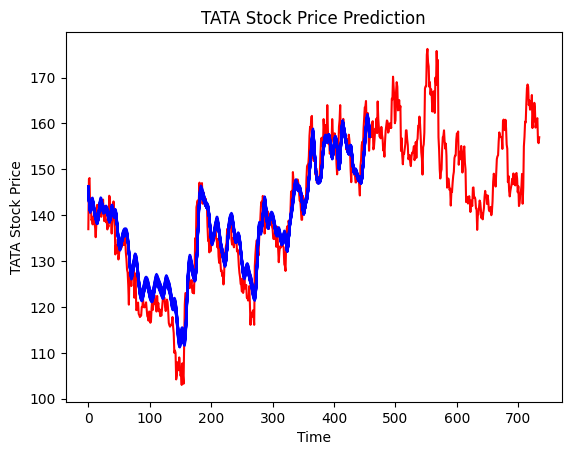

In [12]:
plt.plot(test_set, color = 'red', label = 'Test TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
#plt.legend()
plt.show()


Conclusion

From the plot we can see that the test stock price went up while our model also predicted that the price of the stock will go up. This clearly shows how powerful LSTMs are for analyzing time series and sequential data.